In [4]:
# 사용되는 패키지
import re
import missingno as msno
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 컬럼 display 제한 상향
pd.set_option('display.max_columns', 500)

# 지수 표기법 해제
pd.options.display.float_format = '{:.5f}'.format

In [2]:
raw_data = pd.read_csv("vehicles.csv")

In [549]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin']]

## 차대 번호(vin)를 활용한 데이터 필터링

### 'vin'을 이용한 결측치 제거

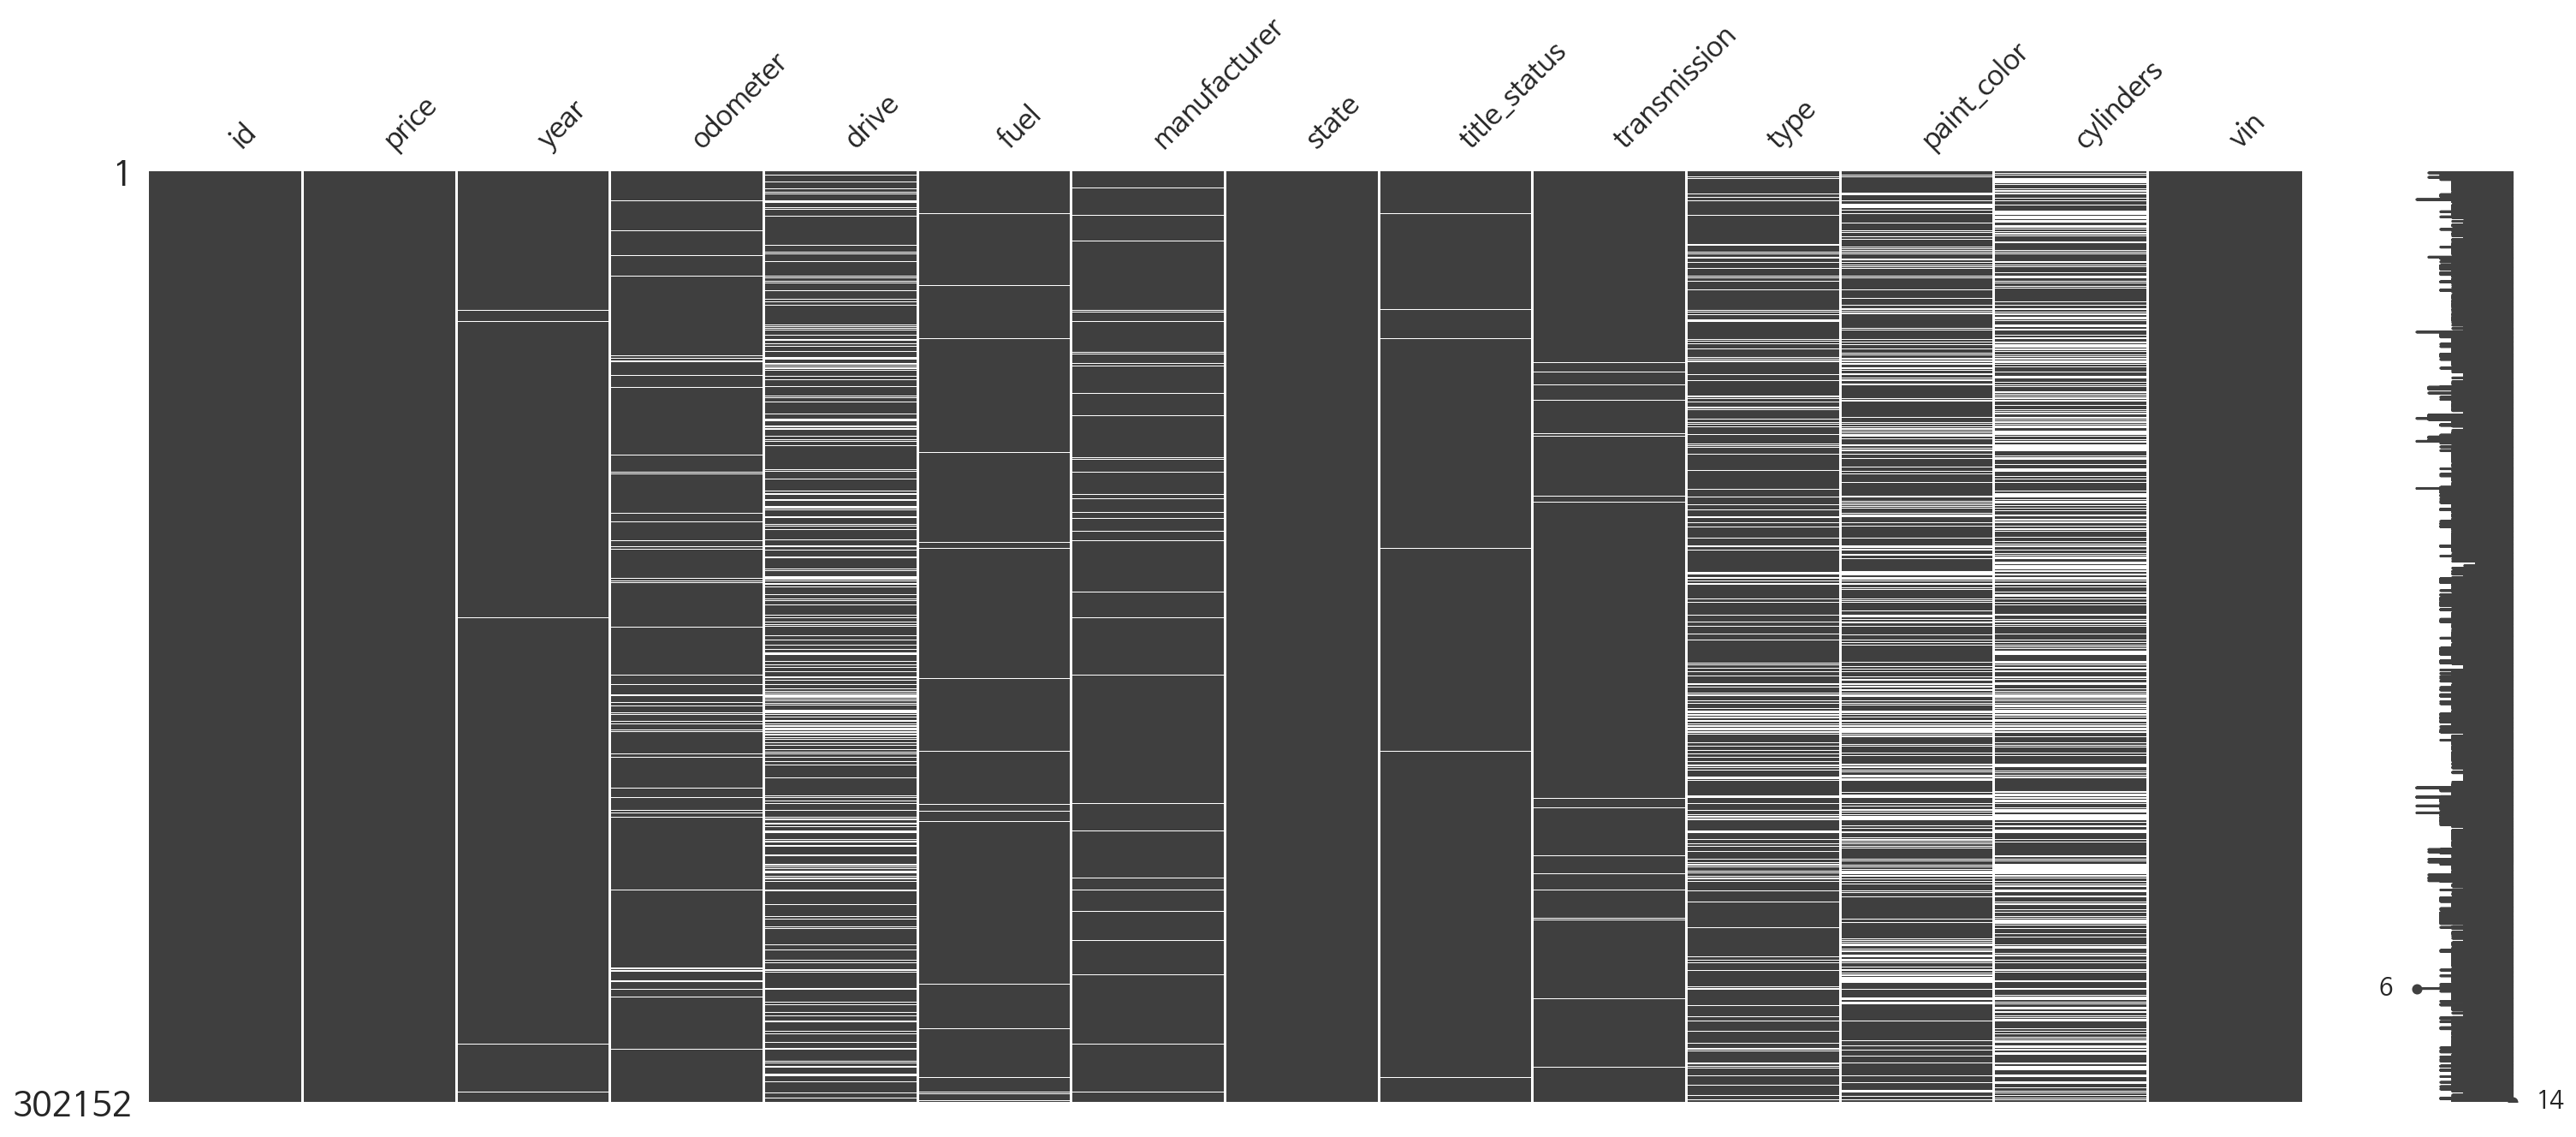

In [551]:
start_df = start_df.dropna(subset=['vin'])
msno.matrix(start_df)

### vin 중복제거
- 중복된 'vin'을 가지고 있는 데이터 삭제

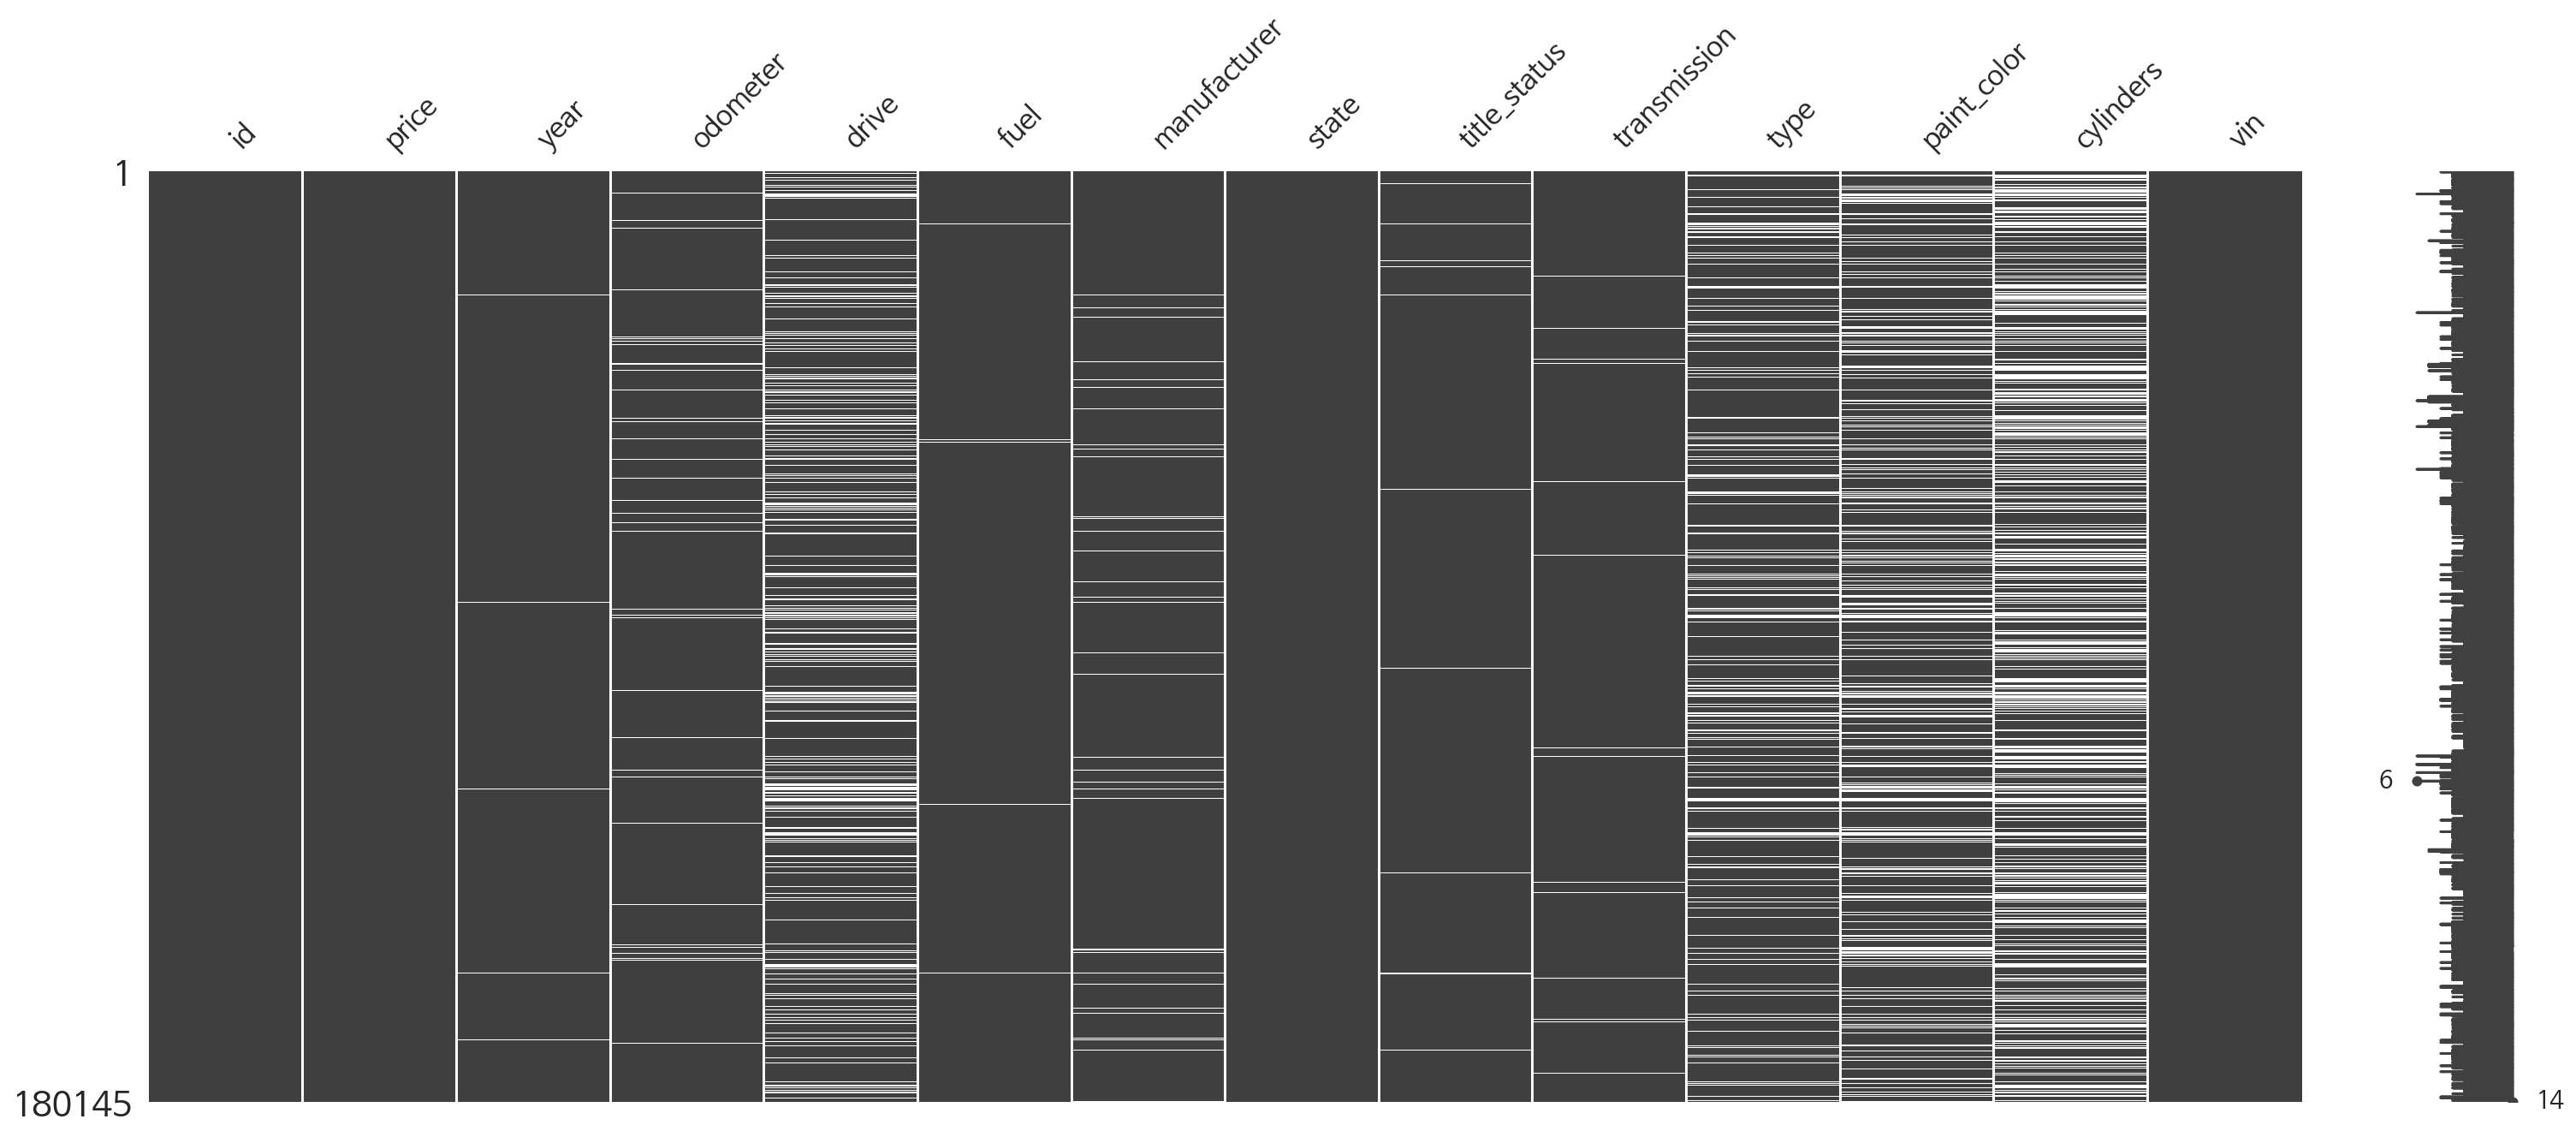

In [552]:
vin_non_dup_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]
msno.matrix(vin_non_dup_df)

# 1. condition, size 컬럼 제외 데이터

In [380]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# 결측치 모두 제거
start_df = start_df.dropna(axis=0)

# do_that_thing 함수 실행
result1 = do_that_thing(start_df, start_df.columns.difference(['id','vin']))
result1

[{'R2adj': 0.8545455224669836, 'RMSE': 0.25982432792577503}]

# 2. condition, size 컬럼 포함 - nan 값을 가지고 있는 row 삭제

In [381]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','condition','size']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# 결측치 모두 제거
start_df = start_df.dropna(axis=0)
result2 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result2

[{'R2adj': 0.8474072031470399, 'RMSE': 0.2685261661343928}]

# 3. condition, size 컬럼 포함 - nan값을 othrer로 채운후 확인

In [382]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','condition','size']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# condition, size 제외한 nan 제거
start_df = start_df.dropna(subset=start_df.columns.difference(['condition','size']))
start_df['condition'] = start_df['condition'].fillna('other')
start_df['size']= start_df['size'].fillna('other')

result3 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result3


[{'R2adj': 0.8545113242380333, 'RMSE': 0.2550145174504646}]

# 4. condition, size 컬럼 포함 - nan값을 최빈값으로 채운후 확인

In [383]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','condition','size']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# condition, size 제외한 nan 제거
start_df = start_df.dropna(subset=start_df.columns.difference(['condition','size']))

start_df['condition'] = start_df['condition'].fillna('excellent')
start_df['size']= start_df['size'].fillna('full-size')

result4 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result4


[{'R2adj': 0.8545124344313196, 'RMSE': 0.2549584853562644}]

# 5. condition - null 값 삭제

In [384]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','condition']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# 결측치 모두 제거
start_df = start_df.dropna(axis=0)
result5 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result5

[{'R2adj': 0.8490411288602975, 'RMSE': 0.2584232073301536}]

# 6. condition - null값 other

In [385]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','condition']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# condition, size 제외한 nan 제거
start_df = start_df.dropna(subset=start_df.columns.difference(['condition','size']))
start_df['condition'] = start_df['condition'].fillna('other')

result6 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result6


[{'R2adj': 0.8545071335507372, 'RMSE': 0.2560452463644774}]

# 7. condition - null값 최빈값


In [386]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','condition']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# condition, size 제외한 nan 제거
start_df = start_df.dropna(subset=start_df.columns.difference(['condition','size']))
start_df['condition'] = start_df['condition'].fillna('excellent')

result7 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result7


[{'R2adj': 0.8545272985613922, 'RMSE': 0.2560783381994435}]

# 8. size - null값 삭제

In [387]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','size']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# 결측치 모두 제거
start_df = start_df.dropna(axis=0)
result8 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result8

[{'R2adj': 0.8465190630539439, 'RMSE': 0.26266158033035814}]

# 9. size - null값 other

In [389]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','size']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# condition, size 제외한 nan 제거
start_df = start_df.dropna(subset=start_df.columns.difference(['condition','size']))
start_df['size'] = start_df['size'].fillna('other')

result9 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result9


[{'R2adj': 0.8545280890939617, 'RMSE': 0.2587030884920769}]

# 10. size - null값 최빈값

In [390]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin','size']]

# vin의 null 값 제거
start_df = start_df.dropna(subset=['vin'])

# vin의 중복 제거
start_df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]

# condition, size 제외한 nan 제거
start_df = start_df.dropna(subset=start_df.columns.difference(['condition','size']))
start_df['size'] = start_df['size'].fillna('full-size')

result10 = do_that_thing(start_df,start_df.columns.difference(['id','vin']))
result10


[{'R2adj': 0.8545000945786991, 'RMSE': 0.25875989448420705}]

### 필요 함수 선언

In [197]:
def data_filter_and_split(df):
    df=df[df.columns.difference(['error'])]
    df = df.dropna(axis=0)
    
    sigma_2_df = df[(df['price'] >= (df['average'] - (df['stdev']*2))) & (df['price'] <= (df['average'] + (df['stdev']*2)))]
    sigma_2_df['year'] = sigma_2_df['year'].astype('int')
    
    sigma_2_df[sigma_2_df['mileage'] != sigma_2_df['odometer']].sort_values(ascending=False,by='odometer').head(2)
    sigma_2_df = sigma_2_df[sigma_2_df['mileage'] == sigma_2_df['odometer']]
    sigma_2_df['year'] = sigma_2_df['year'].apply(lambda x : 2019 if x < 1980 else x)
    sigma_2_df = sigma_2_df[(sigma_2_df['vin'] != '1GCWGFBA7C1155304') & (sigma_2_df['vin'] != '1GCWGFBA8C1126880') & (sigma_2_df['vin'] != '1FMCU03115KA47874')]
    sigma_2_df= sigma_2_df[sigma_2_df['odometer'] != 0]
    sigma_2_df= sigma_2_df[sigma_2_df['price'] != 0]
    return sigma_2_df

In [200]:
def check_under_10_index(start_num,end_num,columns,df):
    test = {}
    test2 = []
    for column in columns:
        len_under_10 = len(df[column].value_counts()[(df[column].value_counts() < end_num) & (df[column].value_counts() > start_num)])
        if len_under_10:
            for i in range(len_under_10):
                index = df[df[column] == df[column].value_counts()[(df[column].value_counts() < end_num) & (df[column].value_counts() > start_num)].index[i]].index.values
                value = df[column].value_counts()[(df[column].value_counts() < end_num) & (df[column].value_counts() > start_num)].index[i]  
                test[value] = index
    test2.append(test)
    return test2

### 10개 미만 데이터 우선 삭제

In [203]:
def delete_under_ten(df):
    for column in df.columns.difference(['id','price','odometer','year']):
        values = [value for value in df[column].value_counts()[df[column].value_counts() < 10].keys()]
        if values:
            for value in values:
                df = df[df[column] != value]
    return df

In [336]:
def adjusted_r_squared(X, Y, r2):
    n = X.shape[0] 
    p = pd.get_dummies(X).shape[1]
    adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

    return adj_r

In [334]:
def delete_under_ten(df):
    for column in df.columns.difference(['id','price','odometer','year']):
        values = [value for value in df[column].value_counts()[df[column].value_counts() < 10].keys()]
        if values:
            for value in values:
                df = df[df[column] != value]
    return df

In [439]:
def do_that_thing(start_df,columns_to_regression):
    
    # 크롤링 데이터와 merge
    for_return_list = []
    irst_half_crawling_data = pd.read_csv('./final_vin_crawling.csv')
    secend_half_crawling_data = pd.read_csv('./vin_crawling_addtional.csv')
    vin_crawling_data = pd.concat([first_half_crawling_data, secend_half_crawling_data], axis=0)

    # 대문자 변경
    vin_crawling_data['vin'] = vin_crawling_data['vin'].str.upper()

    # 중복제거
    vin_crawling_data = vin_crawling_data.drop_duplicates('vin',keep='first')

    # 대문자 변경
    start_df['vin'] = start_df['vin'].str.upper()

    # merge
    merged_df = pd.merge(start_df,vin_crawling_data,on='vin')

    # 중복 제거
    merged_df = merged_df.drop_duplicates('vin',keep='first')

    # 필요 없는 컬럼 제거
    df = merged_df[merged_df.columns.difference(['id_y','id_x','Unnamed: 0','Unnamed: 0.1','og_vin'])]
    
    
    
    # error 컬럼 제거 및 error 결측치를 가지는 데이터 제거
    df = df[df.columns.difference(['error'])]
    df = df.dropna(axis=0)
    
    # 2sigma 데이터 필터링
    sigma_2_df = df[(df['price'] >= (df['average'] - (df['stdev']*2))) & (df['price'] <= (df['average'] + (df['stdev']*2)))]
    
    # year 실수형
    sigma_2_df['year'] = sigma_2_df['year'].astype('int')
    
    #  아웃라이어 처리
    sigma_2_df[sigma_2_df['mileage'] != sigma_2_df['odometer']].sort_values(ascending=False,by='odometer').head(2)
    sigma_2_df = sigma_2_df[sigma_2_df['mileage'] == sigma_2_df['odometer']]
    sigma_2_df['year'] = sigma_2_df['year'].apply(lambda x : 2019 if x < 1980 else x)
    sigma_2_df = sigma_2_df[(sigma_2_df['vin'] != '1GCWGFBA7C1155304') & (sigma_2_df['vin'] != '1GCWGFBA8C1126880') & (sigma_2_df['vin'] != '1FMCU03115KA47874')]
    sigma_2_df= sigma_2_df[sigma_2_df['odometer'] != 0]
    sigma_2_df= sigma_2_df[sigma_2_df['price'] != 0]
    
    # 분석에 필요한 컬럼만 남기기
    df = sigma_2_df[columns_to_regression]
    
    # 인덱스 재설정
    df = df.reset_index(drop=True)
    
    # 빈도수 10미만 데이터 인덱스 데이터 프레임 만들기
    index_dict = check_under_10_index(2,10, df[['cylinders','manufacturer','title_status','type']],df)
    index_df = pd.DataFrame(index_dict)
    
    # 데이터 분배를 위한 작업
    for_test_data = []
    for_train_data_train = []
    for_train_data_test = []
    for column in index_df.columns:
        start = list(index_df[column][0])
        random.shuffle(start)
        if len(start) > 4:
            m = [start[i:i + 2] for i in range(0, len(start), 2)]
            for_test_data.append(m[0])
            for_train_data_train.append(m[1])
            for_train_data_test.append(m[2])
        elif len(start) == 4:
            m = [start[:2], start[2:3], start[3:]]
            for_test_data.append(m[0])
            for_train_data_train.append(m[1])
            for_train_data_test.append(m[2])
        else :
            m = [[i] for i in start]
            for_test_data.append(m[0])
            for_train_data_train.append(m[1])
            for_train_data_test.append(m[2])
            
    df_deleted_under_ten = delete_under_ten(df)

    # 데이터 분할
    train_train_data, train_test_data = train_test_split(df_deleted_under_ten, test_size = .20, random_state = 0)

    train_train_data = pd.concat([train_train_data, df.iloc[[element for array in for_train_data_train for element in array]]],axis=0)
    
    train_test_data = pd.concat([train_test_data,df.iloc[[element for array in for_train_data_test for element in array]]],axis=0)
    

    # 모델링
    model = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +{}".format("+".join(train_train_data.columns.difference(['price','odometer','year'])))+"+0",train_train_data)
    
    
    result = model.fit()
    predicted = result.predict(train_test_data)    
    r2 = r2_score(np.log(train_test_data['price']),predicted)
    
    rmse_test = (np.sqrt(mean_squared_error(np.log(train_test_data['price']), predicted)))


    
    # cross validation
    kf = KFold(10, shuffle=True, random_state=0)
    model_1_cross_val_score = []
    for X_train_index, X_test_index in kf.split(train_train_data):

        X_train= train_train_data.iloc[X_train_index]
        X_test = train_train_data.iloc[X_test_index]

        X_train = pd.concat([X_train, train_train_data[train_train_data.index.isin([element for array in for_train_data_train for element in array])]], axis=0)
        X_test = pd.concat([X_test, train_train_data[train_train_data.index.isin([element for array in for_train_data_test for element in array])]], axis=0)
        
        model1 = sm.OLS.from_formula("np.log(price) ~ scale(odometer) + scale(year) +{}".format("+".join(train_data.columns.difference(['price','odometer','year'])))+"+0",X_train)
        result = model1.fit()
        pred = result.predict(X_test)
        model_1_cross_val_score.append(r2_score(np.log(X_test.price),pred))
    
    
    # R2 adj 확인
    adjusted_r_square = adjusted_r_squared(train_train_data[train_train_data.columns.difference(['price'])], train_train_data['price'], np.mean(model_1_cross_val_score))
    result_data = {
        "R2adj" : adjusted_r_square,
        "RMSE" : rmse_test
    }
    for_return_list.append(result_data)
    
    
    return for_return_list

# 비교 결과

In [391]:
case_result = pd.DataFrame([result1[0],result2[0],result3[0],result4[0],result5[0],result6[0],result7[0],result8[0],result9[0],result10[0]])

### 그래프 설명
0. condition, size 제외
1. condition, size 컬럼 포함 - nan 값을 가지고 있는 row 삭제
2. condition, size 컬럼 포함 - nan값을 othrer로 채운후 확인
3. condition, size 컬럼 포함 - nan값을 최빈값으로 채운후 확인
4. condition - null 값 삭제
5. condition - null값 other
6. condition - null값 최빈값
7. size - null값 삭제
8. size - null값 other
9. size - null값 최빈값


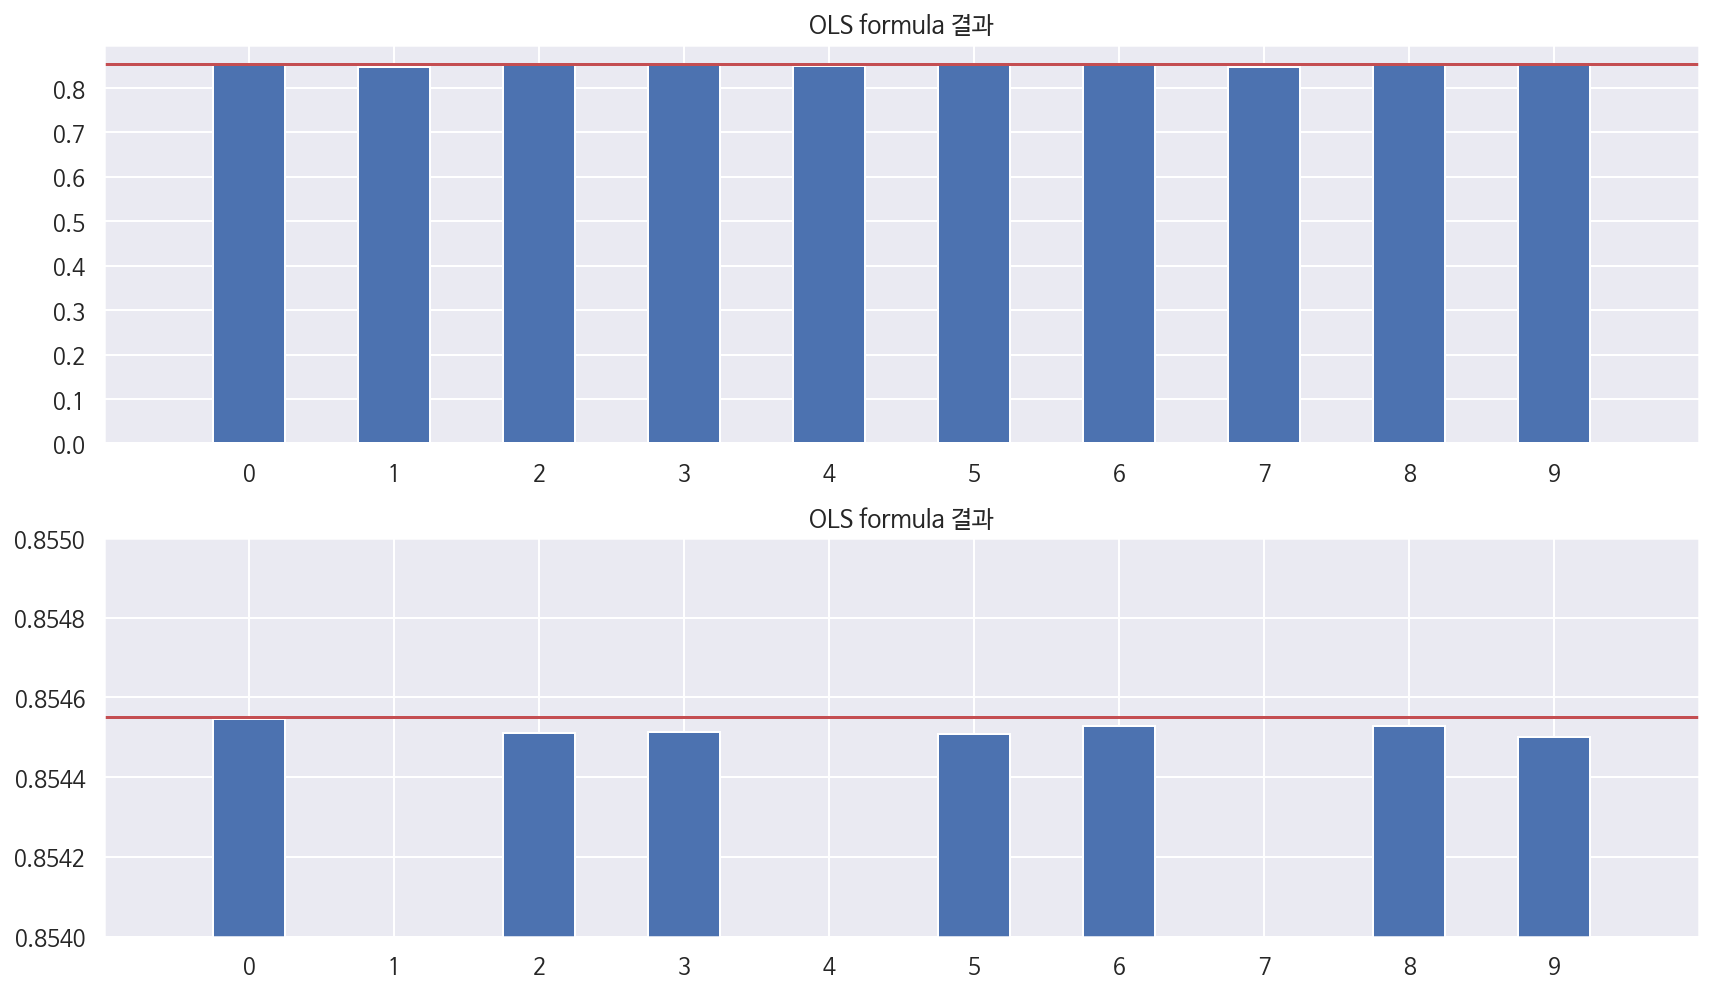

In [434]:
plt.figure(figsize=(12,7))
plt.subplot(211)
case_result['R2adj'].plot.bar()
plt.xlim(-1,10)
plt.xticks(rotation=0)
plt.title("OLS formula 결과")
plt.axhline(y=0.85455,c='r')

plt.subplot(212)
case_result['R2adj'].plot.bar()
plt.xlim(-1,10)
plt.ylim(.854,.855)
plt.xticks(rotation=0)
plt.title("OLS formula 결과")
plt.axhline(y=0.85455,c='r')
plt.tight_layout()
plt.show()

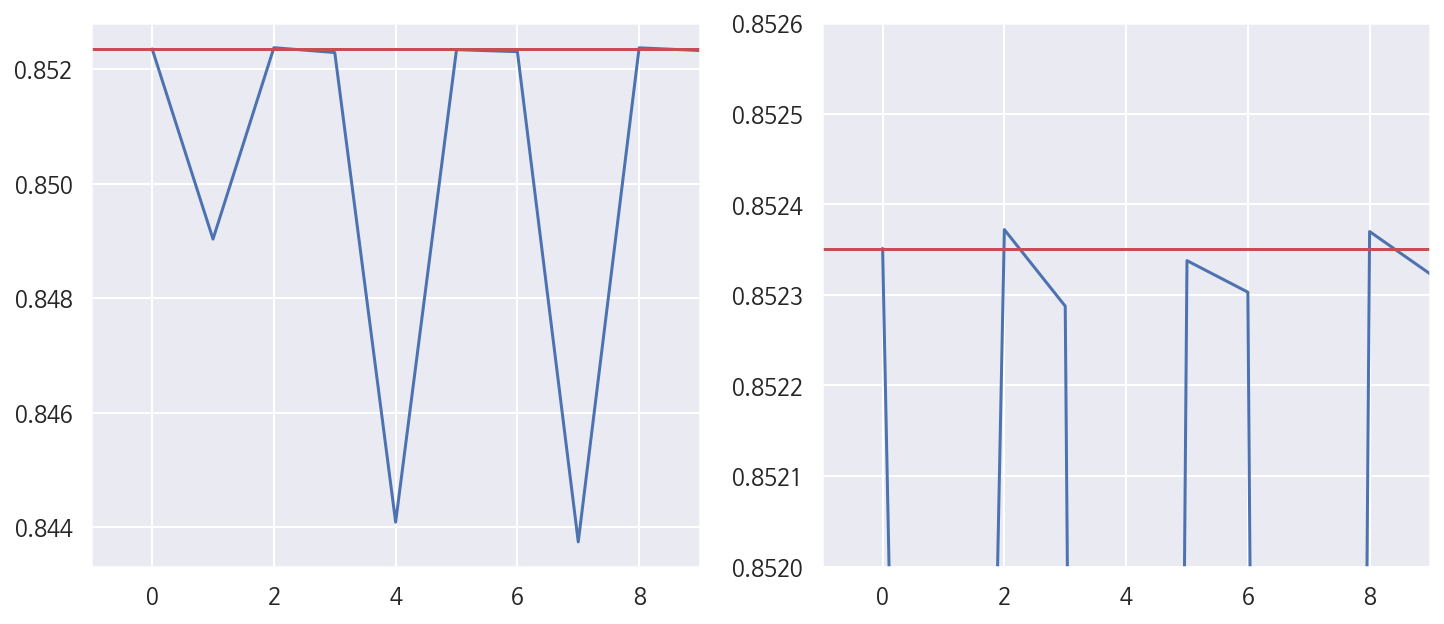

In [294]:
plt.figure(figsize=(12,5))
plt.subplot(121)
case_result['R2adj'].plot()
plt.xlim(-1,9)

plt.axhline(y=0.85235,c='r')
plt.subplot(122)
case_result['R2adj'].plot()
plt.xlim(-1,9)
plt.ylim(0.852,0.8526)
plt.axhline(y=0.85235,c='r')

In [436]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(test))
train_data_standardScaled = standardScaler.transform(test)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [437]:
def adjusted_r_squared(X, Y, r2):
    n = X.shape[0] 
    p = pd.get_dummies(X).shape[1]
    adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

    return adj_r

In [438]:
def delete_under_ten(df):
    for column in df.columns.difference(['id','price','odometer','year']):
        values = [value for value in df[column].value_counts()[df[column].value_counts() < 10].keys()]
        if values:
            for value in values:
                df = df[df[column] != value]
    return df